#### 2019-10-15_SLX_AMOCz_NATL025_forIxetl

* Provide files of the max AMOCz from NATL025-GSL301 and NATL025-TCLB300.
* Monthly (1m) and Annual means (A). 
* dt for detrended
* dtdc for detrended and deseasonnized

* The notebook above illustrates with simple plots the use of these files
* The last figure of the notebook here can be compared with Fig.6a in Leroux et al 2018.


# Modules

In [38]:
###########################################################################
###########################################################################
###########################################################################
#===================== MODULES

import os, sys
import math
import numpy as np
import xarray as xr
from scipy.signal import argrelmax
import dask
import numpy as np

# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Read AMOC_z files

In [41]:
# READ
#diri='/Users/leroux/DATA/OCCIPUT_DATA/AMOC/'
diri='/mnt/meom/workdir/lerouste/AMOC_DATASET/NATL025/''

# MONHLY
amocGSL   = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-GSL301.1993-2012.1m.nc')['amocz']
amocTCLB  = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-TCLB300.1994-2012.1m.nc')['amocz']

amocGSL_dt   = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-GSL301.1993-2012.1m_dt.nc')['amocz_dt']
amocTCLB_dt  = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-TCLB300.1994-2012.1m_dt.nc')['amocz_dt']

amocGSL_dtdc   = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-GSL301.1993-2012.1m_dtdc.nc')['amocz_dtdc']
amocTCLB_dtdc  = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-TCLB300.1994-2012.1m_dtdc.nc')['amocz_dtdc']

# ANNUAL
amocGSL_A   = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-GSL301.1993-2012.A.nc')['amocz']
amocTCLB_A  = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-TCLB300.1994-2012.A.nc')['amocz']

amocGSL_A_dt   = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-GSL301.1993-2012.A_dt.nc')['amocz_dt']
amocTCLB_A_dt  = xr.open_dataset(diri+'AMOCZ.MAX.NATL025-TCLB300.1994-2012.A_dt.nc')['amocz_dt']

# check plots

* GSL vs TCLB - raw data

Text(0.5,1,'GSL vs TCLB - raw data')

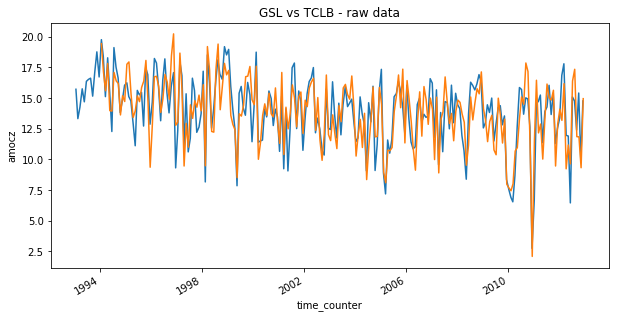

In [42]:
rapidmb1 = amocGSL.sel(nav_lat=26.,method='nearest',e=10)
rapidmb2 = amocTCLB.sel(nav_lat=26.,method='nearest',e=10)

# plot timeseries
fig1 = plt.figure(figsize=([10,5]),facecolor='white')  
rapidmb1.plot()
rapidmb2.plot()
plt.title('GSL vs TCLB - raw data')

* GSL raw vs detrended

Text(0.5,1,'GSL raw vs detrended')

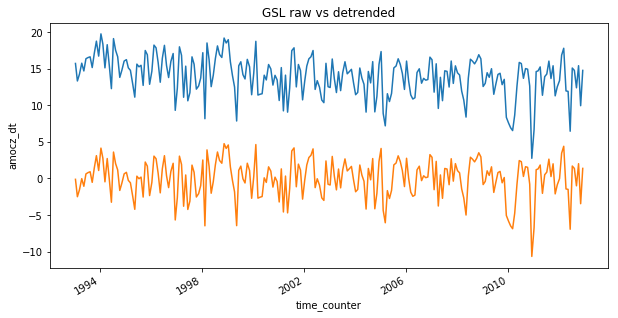

In [43]:
rapidmb1 = amocGSL.sel(nav_lat=26.,method='nearest',e=10)
rapidmb2 = amocGSL_dt.sel(nav_lat=26.,method='nearest',e=10) #+rapidmb1.mean(dim='time_counter')

# plot timeseries
fig1 = plt.figure(figsize=([10,5]),facecolor='white')  
rapidmb1.plot()
rapidmb2.plot()
plt.title('GSL raw vs detrended')

* TCLB raw vs detrended

Text(0.5,1,'TCLB raw vs detrended')

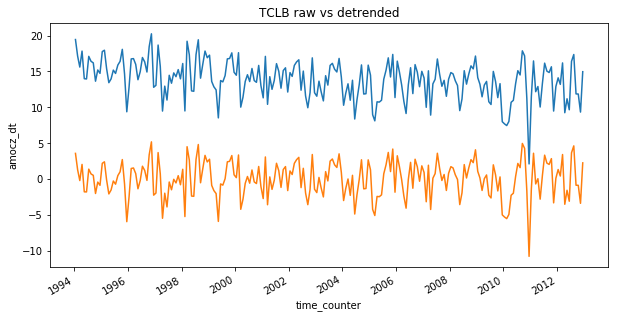

In [44]:
rapidmb1 = amocTCLB.sel(nav_lat=26.,method='nearest',e=10)
rapidmb2 = amocTCLB_dt.sel(nav_lat=26.,method='nearest',e=10) #+rapidmb1.mean(dim='time_counter')

# plot timeseries
fig1 = plt.figure(figsize=([10,5]),facecolor='white')  
rapidmb1.plot()
rapidmb2.plot()
plt.title('TCLB raw vs detrended')

* TCLB dt vs dtdc

Text(0.5,1,'TCLB dt vs dtdc')

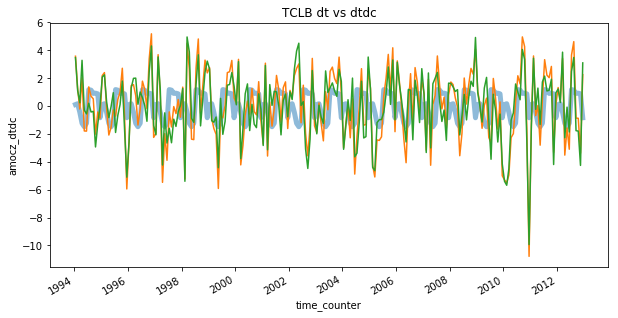

In [45]:
rapidmb1 = amocTCLB_dt.sel(nav_lat=26.,method='nearest',e=10)
rapidmb2 = amocTCLB_dtdc.sel(nav_lat=26.,method='nearest',e=10) 
rapidmb3 = rapidmb1-rapidmb2

# plot timeseries
fig1 = plt.figure(figsize=([10,5]),facecolor='white')  
rapidmb3.plot(linewidth=5,alpha=0.5)
rapidmb1.plot()
rapidmb2.plot()

plt.title('TCLB dt vs dtdc')

Text(0.5,1,'GSL dt vs dtdc')

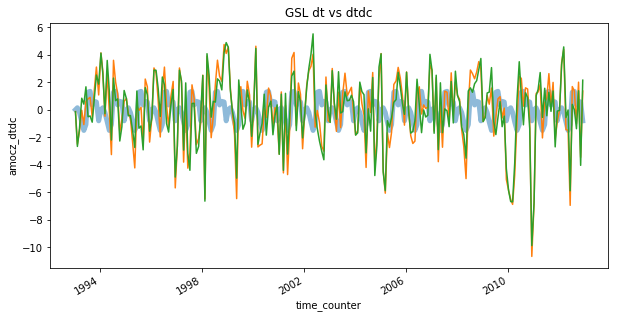

In [46]:
rapidmb1 = amocGSL_dt.sel(nav_lat=26.,method='nearest',e=10)
rapidmb2 = amocGSL_dtdc.sel(nav_lat=26.,method='nearest',e=10) 
rapidmb3 = rapidmb1-rapidmb2

# plot timeseries
fig1 = plt.figure(figsize=([10,5]),facecolor='white')  
rapidmb3.plot(linewidth=5,alpha=0.5)
rapidmb1.plot()
rapidmb2.plot()

plt.title('GSL dt vs dtdc')

# Plot timeseries at Rapid array (lat: 26.5N): from ANNUAL timeseries

NOTE: the time coordinate of the ANNUAL FILES is recorded at the end of the given year: if he monthly series starts on he 01-01-1993, the first date of the ANNUAL mean series will be 31-12-1993.

In [47]:
amocGSL_A_dt

<xarray.DataArray 'amocz_dt' (time_counter: 20, e: 50, nav_lat: 530)>
[530000 values with dtype=float64]
Coordinates:
  * nav_lat       (nav_lat) float32 -20.662 -20.4279 -20.1935 -19.9587 ...
  * time_counter  (time_counter) datetime64[ns] 1993-12-31 1994-12-31 ...
  * e             (e) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    long_name:  detrended amoc z (lowess)

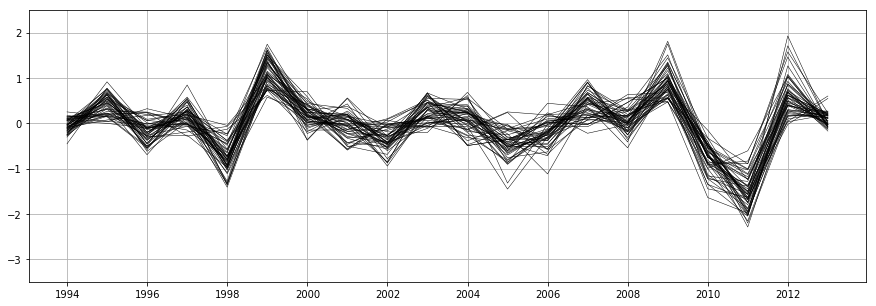

In [48]:
data2plot = amocGSL_A_dt
diro=diri
dpifig=300
# latitude at which to plot
jl=26.5

# output plot name
plto = 'amocAdt_lat_'+str(jl)

fig2 = plt.figure(figsize=([15,5]),facecolor='white')  
for im in range(0,50):
    plt.plot(data2plot.time_counter,data2plot.sel(e=im,nav_lat=jl,method='nearest'),color='k',linewidth=0.5)
    
plt.ylim(-3.5,2.5)

ax = plt.gca()
ax.grid(True, which='both') 

plt.show()

# Save fig in png, resolution dpi
fig2.savefig(diro+"/"+plto+'.png', facecolor=fig2.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# close fig
plt.close(fig2)   


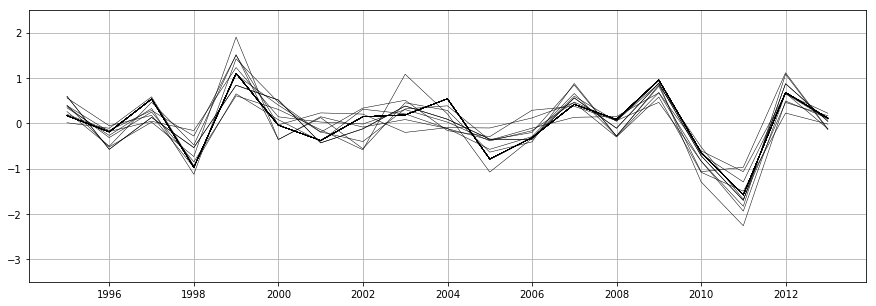

In [49]:
data2plot = amocTCLB_A_dt
diro=diri
dpifig=300
# latitude at which to plot
jl=26.5

# output plot name
plto = 'amocAdt_lat_'+str(jl)

fig2 = plt.figure(figsize=([15,5]),facecolor='white')  
for im in range(0,50):
    plt.plot(data2plot.time_counter,data2plot.sel(e=im,nav_lat=jl,method='nearest'),color='k',linewidth=0.5)
    
plt.ylim(-3.5,2.5)

ax = plt.gca()
ax.grid(True, which='both') 

plt.show()

# Save fig in png, resolution dpi
fig2.savefig(diro+"/"+plto+'.png', facecolor=fig2.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# close fig
plt.close(fig2)   


# LATIUDE-VARIANCE PLOS : TCLB EMEAN AND ESTD

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: M

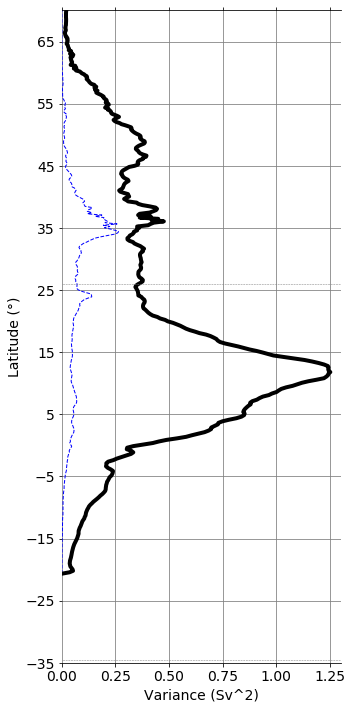

In [50]:
TM_ESTD   = amocTCLB_A_dt.var(dim='e').mean(dim='time_counter')
TM_EMEAN  = amocTCLB_A_dt.mean(dim='e').var(dim='time_counter')

    
plt.close('all')  
fig1 = plt.figure(figsize=([5,12]),facecolor='white')  #A9D0F5


plt.plot(TM_ESTD,TM_ESTD.nav_lat,color="b",linewidth=1,linestyle="--")

plt.plot(TM_EMEAN,TM_EMEAN.nav_lat,color="k",linewidth=4.,linestyle="-")
plt.plot([-100.,100.],[26.,26.],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100.,100.],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.ylim( -35, 70 )
plt.xlim( 0, 1.3 )
ax = plt.gca()    

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_xaxis().tick_top() 
ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left() 
ax.get_yaxis().tick_right()
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

plt.ylabel(u"Latitude (\u00B0)")

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
        labelbottom="on", left="on", right="off", labelright="off",labelleft="on")  


plt.xlabel('Variance (Sv^2)')

    

plt.show()   
fig1.savefig(diro+"testvarA.png", facecolor=fig1.get_facecolor(), edgecolor='none')


# GSL EMEAN AND ESTD

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: M

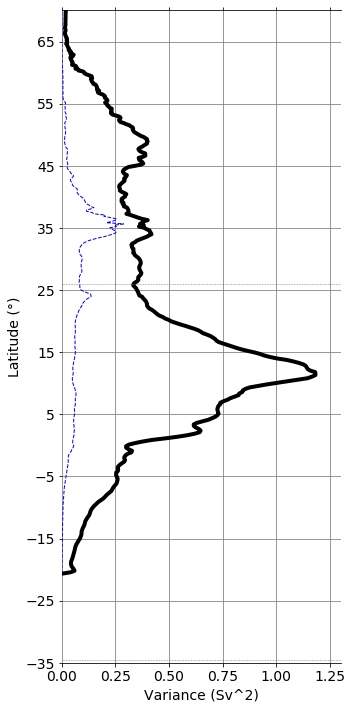

In [51]:
TM_ESTD   = amocGSL_A_dt.var(dim='e').mean(dim='time_counter')
TM_EMEAN  = amocGSL_A_dt.mean(dim='e').var(dim='time_counter')

    
plt.close('all')  
fig1 = plt.figure(figsize=([5,12]),facecolor='white')  #A9D0F5


plt.plot(TM_ESTD,TM_ESTD.nav_lat,color="b",linewidth=1,linestyle="--")

plt.plot(TM_EMEAN,TM_EMEAN.nav_lat,color="k",linewidth=4.,linestyle="-")
plt.plot([-100.,100.],[26.,26.],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100.,100.],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.ylim( -35, 70 )
plt.xlim( 0, 1.3 )
ax = plt.gca()    

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_xaxis().tick_top() 
ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left() 
ax.get_yaxis().tick_right()
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

plt.ylabel(u"Latitude (\u00B0)")

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
        labelbottom="on", left="on", right="off", labelright="off",labelleft="on")  


plt.xlabel('Variance (Sv^2)')

    

plt.show()   
fig1.savefig(diro+"testvarA.png", facecolor=fig1.get_facecolor(), edgecolor='none')


# GSL vs CLB (intrinsic only)
- can be compared with thin blue solid line in FIG6.1 of Leroux e al 2018 )

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: M

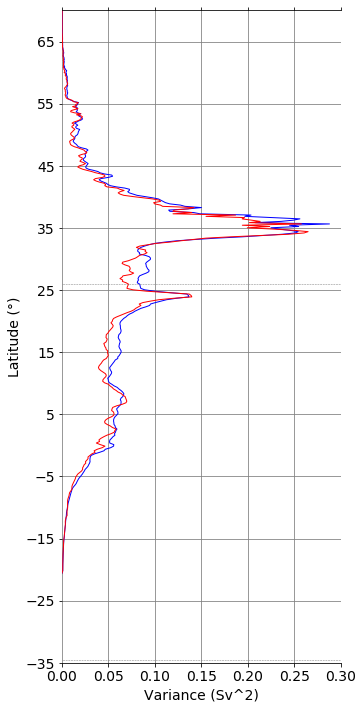

In [52]:
TM_ESTD   = amocGSL_A_dt.var(dim='e').mean(dim='time_counter')
TM_EMEAN  = amocGSL_A_dt.mean(dim='e').var(dim='time_counter')

TM_ESTD2   = amocTCLB_A_dt.var(dim='e').mean(dim='time_counter')
TM_EMEAN2  = amocTCLB_A_dt.mean(dim='e').var(dim='time_counter')

    
plt.close('all')  
fig1 = plt.figure(figsize=([5,12]),facecolor='white')  #A9D0F5


plt.plot(TM_ESTD,TM_ESTD.nav_lat,color="b",linewidth=1,linestyle="-")
plt.plot(TM_ESTD2,TM_ESTD2.nav_lat,color="r",linewidth=1,linestyle="-")

#plt.plot(TM_EMEAN,TM_EMEAN.nav_lat,color="k",linewidth=4.,linestyle="-")
plt.plot([-100.,100.],[26.,26.],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100.,100.],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.ylim( -35, 70 )
plt.xlim( 0, 0.3 )
ax = plt.gca()    

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_xaxis().tick_top() 
ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left() 
ax.get_yaxis().tick_right()
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

plt.ylabel(u"Latitude (\u00B0)")

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
        labelbottom="on", left="on", right="off", labelright="off",labelleft="on")  


plt.xlabel('Variance (Sv^2)')

    

plt.show()   
fig1.savefig(diro+"testvarA.png", facecolor=fig1.get_facecolor(), edgecolor='none')
